## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

from Model_Parent import *
from Model_Parent_2 import *

## Importing Data

In [3]:
df = pd.read_csv("../cleaned_data/bike_sharing_hour.csv", index_col=0)


df

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


## Checking Data

<AxesSubplot:>

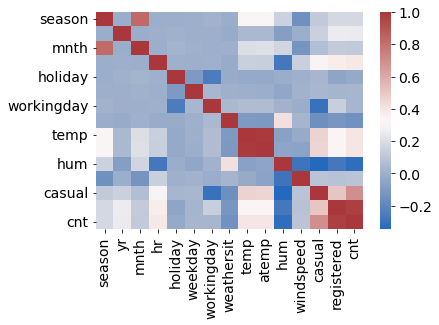

In [4]:
# Check to make sure that no columns have perfect colinearity

corr_mat = df.corr(method='pearson')
sns.heatmap(corr_mat, cmap='vlag')

## Scaling Data

In [5]:
# Storing old columns names
df_col_names = list(df.columns)

# Scaling data by min and max in the range of 0 to 1
scaler = MinMaxScaler(feature_range = [0, 1])
tmp = scaler.fit_transform(df)

# Converting scaled values back into dataframe
df = pd.DataFrame(tmp, columns=df_col_names)

df

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,0.0,0.0,0.0,0.000000,0.0,1.000000,0.0,0.000000,0.224490,0.2879,0.81,0.000000,0.008174,0.014673,0.015369
1,0.0,0.0,0.0,0.043478,0.0,1.000000,0.0,0.000000,0.204082,0.2727,0.80,0.000000,0.021798,0.036117,0.039959
2,0.0,0.0,0.0,0.086957,0.0,1.000000,0.0,0.000000,0.204082,0.2727,0.80,0.000000,0.013624,0.030474,0.031762
3,0.0,0.0,0.0,0.130435,0.0,1.000000,0.0,0.000000,0.224490,0.2879,0.75,0.000000,0.008174,0.011287,0.012295
4,0.0,0.0,0.0,0.173913,0.0,1.000000,0.0,0.000000,0.224490,0.2879,0.75,0.000000,0.000000,0.001129,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,0.0,1.0,1.0,0.826087,0.0,0.166667,1.0,0.333333,0.244898,0.2576,0.60,0.193018,0.029973,0.121896,0.120902
17375,0.0,1.0,1.0,0.869565,0.0,0.166667,1.0,0.333333,0.244898,0.2576,0.60,0.193018,0.021798,0.091422,0.090164
17376,0.0,1.0,1.0,0.913043,0.0,0.166667,1.0,0.000000,0.244898,0.2576,0.60,0.193018,0.019074,0.093679,0.091189
17377,0.0,1.0,1.0,0.956522,0.0,0.166667,1.0,0.000000,0.244898,0.2727,0.56,0.157870,0.035422,0.054176,0.061475


## Breaking Data in X and y

In [6]:
X = df.iloc[:,:-1]

In [7]:
y = df.iloc[:,-1]

# Generating Models

In [8]:
# Imports to build layered neural nets
from keras.models import Sequential
from keras.layers import Dense

In [9]:
# Defining number of folds in cross validation (kfolds method)
cv_folds = 5

# Defining number of epochs
epo = 10

# Defining batch size
bs = 1000

## 2 Layer Neural Networks

### Sigmoid Activation Function

In [10]:
# nur_list is a list of number of neurons for each layer.
# In this case the first 2 values in the list are neurons of first 2 layers.
# The last value corresponds to the output layer
nur_list = [10, 5, 1]

# a_func is the activation function of choice
a_func = 'sigmoid'

# opt is the optimazation function of choice
opt = 'adam'

# loss_ is the loss funciton of choice
loss_ = 'mean_squared_error'

In [11]:
nnCrossValidation(X, y, cv_folds, epo, bs, nur_list, a_func, opt, loss_)

2022-03-28 13:14:50.220946: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/10
14/14 [==============================] - 1s 5ms/step - loss: 0.2240
Epoch 2/10
14/14 [==============================] - 0s 4ms/step - loss: 0.1998
Epoch 3/10
14/14 [==============================] - 0s 4ms/step - loss: 0.1771
Epoch 4/10
14/14 [==============================] - 0s 7ms/step - loss: 0.1561
Epoch 5/10
14/14 [==============================] - 0s 4ms/step - loss: 0.1372
Epoch 6/10
14/14 [==============================] - 0s 3ms/step - loss: 0.1204
Epoch 7/10
14/14 [==============================] - 0s 3ms/step - loss: 0.1059
Epoch 8/10
14/14 [==============================] - 0s 6ms/step - loss: 0.0935
Epoch 9/10
14/14 [==============================] - 0s 4ms/step - loss: 0.0831
Epoch 10/10
14/14 [==============================] - 0s 3ms/step - loss: 0.0746
Epoch 1/10
14/14 [==============================] - 1s 10ms/step - loss: 0.2333
Epoch 2/10
14/14 [==============================] - 0s 4ms/step - loss: 0.2116
Epoch 3/10
14/14 [==============================] 


FORWARD SELECTION REPORT:

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 4.481e+31
Date:                Mon, 28 Mar 2022   Prob (F-statistic):               0.00
Time:                        13:15:25   Log-Likelihood:             5.7598e+05
No. Observations:               17379   AIC:                        -1.152e+06
Df Residuals:                   17364   BIC:                        -1.152e+06
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0010   

/Users/chandler/Desktop/DS2/DS2_P2/python/Model_Parent_2.py:317: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


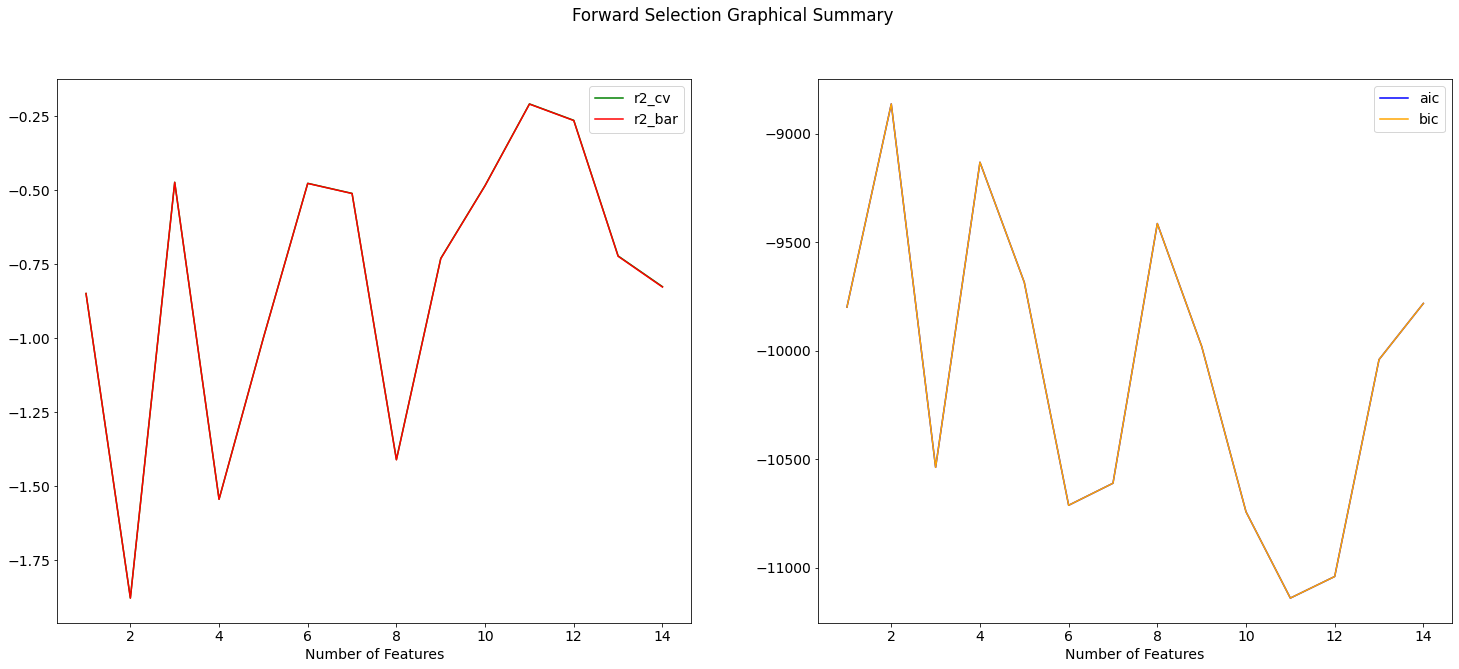

In [12]:
nnForwardSelection(X, y, cv_folds, epo, bs, nur_list, a_func, opt, loss_)

### Tanh Activation Function

In [12]:
# nur_list is a list of number of neurons for each layer.
# In this case the first 2 values in the list are neurons of first 2 layers.
# The last value corresponds to the output layer
nur_list = [10, 5, 1]

# a_func is the activation function of choice
a_func = 'tanh'

# opt is the optimazation function of choice
opt = 'adam'

# loss_ is the loss funciton of choice
loss_ = 'mean_squared_error'

In [13]:
nnCrossValidation(X, y, cv_folds, epo, bs, nur_list, a_func, opt, loss_)

Epoch 1/10
1/1 [==============================] - 1s 596ms/step - loss: 0.5927
Epoch 2/10
1/1 [==============================] - 0s 8ms/step - loss: 0.5706
Epoch 3/10
1/1 [==============================] - 0s 11ms/step - loss: 0.5483
Epoch 4/10
1/1 [==============================] - 0s 9ms/step - loss: 0.5257
Epoch 5/10
1/1 [==============================] - 0s 10ms/step - loss: 0.5030
Epoch 6/10
1/1 [==============================] - 0s 5ms/step - loss: 0.4802
Epoch 7/10
1/1 [==============================] - 0s 17ms/step - loss: 0.4572
Epoch 8/10
1/1 [==============================] - 0s 11ms/step - loss: 0.4343
Epoch 9/10
1/1 [==============================] - 0s 10ms/step - loss: 0.4114
Epoch 10/10
1/1 [==============================] - 0s 10ms/step - loss: 0.3887
Epoch 1/10
1/1 [==============================] - 1s 576ms/step - loss: 0.0758
Epoch 2/10
1/1 [==============================] - 0s 7ms/step - loss: 0.0714
Epoch 3/10
1/1 [==============================] - 0s 13ms/step - 

In [14]:
nnForwardSelection(X, y, cv_folds, epo, bs, nur_list, a_func, opt, loss_)


FORWARD SELECTION REPORT:

                            OLS Regression Results                            
Dep. Variable:               log_area   R-squared:                       0.038
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic:                     1.651
Date:                Sun, 27 Mar 2022   Prob (F-statistic):             0.0745
Time:                        17:28:22   Log-Likelihood:                 109.21
No. Observations:                 517   AIC:                            -192.4
Df Residuals:                     504   BIC:                            -137.2
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0054   

KeyboardInterrupt: 

### ReLU Activation Function

In [ ]:
# nur_list is a list of number of neurons for each layer.
# In this case the first 2 values in the list are neurons of first 2 layers.
# The last value corresponds to the output layer
nur_list = [10, 5, 1]

# a_func is the activation function of choice
a_func = 'relu'

# opt is the optimazation function of choice
opt = 'adam'

# loss_ is the loss funciton of choice
loss_ = 'mean_squared_error'

In [ ]:
nnCrossValidation(X, y, cv_folds, epo, bs, nur_list, a_func, opt, loss_)

In [ ]:
nnForwardSelection(X, y, cv_folds, epo, bs, nur_list, a_func, opt, loss_)

## 3 Layer Neural Networks

### Sigmoid Activation Function

In [ ]:
# nur_list is a list of number of neurons for each layer.
# In this case the first 3 values in the list are neurons of first 3 layers.
# The last value corresponds to the output layer
nur_list = [25, 10, 5, 1]

# a_func is the activation function of choice
a_func = 'sigmoid'

# opt is the optimazation function of choice
opt = 'adam'

# loss_ is the loss funciton of choice
loss_ = 'mean_squared_error'

In [ ]:
nnCrossValidation(X, y, cv_folds, epo, bs, nur_list, a_func, opt, loss_)

In [ ]:
nnForwardSelection(X, y, cv_folds, epo, bs, nur_list, a_func, opt, loss_)

### Tanh Activation Function

In [ ]:
# nur_list is a list of number of neurons for each layer.
# In this case the first 3 values in the list are neurons of first 3 layers.
# The last value corresponds to the output layer
nur_list = [25, 10, 5, 1]

# a_func is the activation function of choice
a_func = 'tanh'

# opt is the optimazation function of choice
opt = 'adam'

# loss_ is the loss funciton of choice
loss_ = 'mean_squared_error'

In [ ]:
nnCrossValidation(X, y, cv_folds, epo, bs, nur_list, a_func, opt, loss_)

In [ ]:
nnForwardSelection(X, y, cv_folds, epo, bs, nur_list, a_func, opt, loss_)

### ReLU Activation Function

In [ ]:
# nur_list is a list of number of neurons for each layer.
# In this case the first 3 values in the list are neurons of first 3 layers.
# The last value corresponds to the output layer
nur_list = [25, 10, 5, 1]

# a_func is the activation function of choice
a_func = 'relu'

# opt is the optimazation function of choice
opt = 'adam'

# loss_ is the loss funciton of choice
loss_ = 'mean_squared_error'

In [ ]:
nnCrossValidation(X, y, cv_folds, epo, bs, nur_list, a_func, opt, loss_)

In [ ]:
nnForwardSelection(X, y, cv_folds, epo, bs, nur_list, a_func, opt, loss_)

## 5 Layer Neural Networks

### Sigmoid Activation Function

In [ ]:
# nur_list is a list of number of neurons for each layer.
# In this case the first 5 values in the list are neurons of first 5 layers.
# The last value corresponds to the output layer
nur_list = [500, 100, 25, 10, 5, 1]

# a_func is the activation function of choice
a_func = 'sigmoid'

# opt is the optimazation function of choice
opt = 'adam'

# loss_ is the loss funciton of choice
loss_ = 'mean_squared_error'

In [ ]:
nnCrossValidation(X, y, cv_folds, epo, bs, nur_list, a_func, opt, loss_)

In [ ]:
nnForwardSelection(X, y, cv_folds, epo, bs, nur_list, a_func, opt, loss_)

### Tanh Activation Function

In [ ]:
# nur_list is a list of number of neurons for each layer.
# In this case the first 5 values in the list are neurons of first 5 layers.
# The last value corresponds to the output layer
nur_list = [500, 100, 25, 10, 5, 1]

# a_func is the activation function of choice
a_func = 'tanh'

# opt is the optimazation function of choice
opt = 'adam'

# loss_ is the loss funciton of choice
loss_ = 'mean_squared_error'

In [ ]:
nnCrossValidation(X, y, cv_folds, epo, bs, nur_list, a_func, opt, loss_)

In [ ]:
nnForwardSelection(X, y, cv_folds, epo, bs, nur_list, a_func, opt, loss_)

### ReLU Activation Function

In [ ]:
# nur_list is a list of number of neurons for each layer.
# In this case the first 5 values in the list are neurons of first 5 layers.
# The last value corresponds to the output layer
nur_list = [500, 100, 25, 10, 5, 1]

# a_func is the activation function of choice
a_func = 'relu'

# opt is the optimazation function of choice
opt = 'adam'

# loss_ is the loss funciton of choice
loss_ = 'mean_squared_error'

In [ ]:
nnCrossValidation(X, y, cv_folds, epo, bs, nur_list, a_func, opt, loss_)

In [ ]:
nnForwardSelection(X, y, cv_folds, epo, bs, nur_list, a_func, opt, loss_)